# GOPH 457 Assignment 3 : Question 2

Based on Equation 2 and 4, the fluid density and viscosity of water are both a function of temperature. As temperature changes, so does the density and viscosity of water. Hence, the hydraulic conductivity value at different temperature is controlled by the change in density and the viscosity of water (Equation 1). The effect of temperature changes towards hydraulic conductivity are demonstrated mathematically and graphically below. Based on the first two graphs, both density and viscosity of water decreases as temperature increases. Based on the final graph, as temperature increases, the hydraulic conductivity ultimately increases. The K values at 2.7°C and 12.7°C are marked in the graph and it does match the line plot using Equation 4 which proved the relationship between K and temperature mathematically.

# Equation 1 : Hydraulic conductivity general equation

$ \Large K = \frac{k \rho g}{\mu} $

where  

       K is hydraulic conductivity (m/s)
       k is porous medium permeability (m^2)
       ρ is fluid density (kg/m^3)
       g is gravitational acceleration (m/s^2), g = 9.81 m/s^2
       μ is fluid viscosity (Pa s)

# Equation 2 : Density of water equation as a function of temperature

$ \Large\rho = \frac{\rho_{20}}{ 1 + \beta  (x - t_0)} $


where  

       ρ20 is density of water at 20°C (kg/m^3), ρ20 = 998.2071 kg/m^3
       β is volumetric temperature expansion coefficient for water, β = 0.0002
       x is temperature of water (°C)
       t0 is standard temperature (°C), t0 = 20°C
       
Taken from https://www.vcalc.com/wiki/MichaelBartmess/Water+Density+by+Temperature

# Equation 3 : Viscosity of water equation as a function of temperature using Vogel-Tamman-Fulcher (VTF) equation

$ \Large\mu = \mu_0 e^{\frac{B}{(x+273.15)+ T_0}} $


where  

       μ0 = 31.8903e-6 Pa s
       B = 479.9 K
       T0 = -154.05 K
       
Taken from Grant (2005).

# Equation 4 : Modified hydraulic conductivity equation

$ \Large K = \frac{k \left(\frac{\rho_{20}}{ 1 + \beta  (x - t_0)} \right) g}{\mu_0 e^{\frac{B}{(x+273.15)+ T_0}}} $

## Importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Plotting hydraulic conductivity as a function of time (Equation 4)

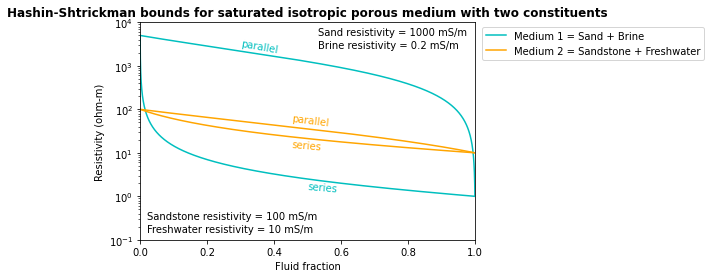

In [114]:
# set constants values
sigma_brine = 1
sigma_sand = 0.2e-3

sigma_water = 0.1
sigma_sandstone = 10e-3

por_range = np.linspace(0, 1, 100000) # set range of temperature

rho_par_values_case1 = [] # initiate an empty list for 𝜌
rho_ser_values_case1 = [] # initiate an empty list for 𝜇

rho_par_values_case2 = [] # initiate an empty list for 𝜌
rho_ser_values_case2 = [] # initiate an empty list for 𝜇

for x in por_range:
    
    beta = x
    
    sigma_f = sigma_brine
    sigma_s = sigma_sand
    sigma_conductive = sigma_f + (1 - beta) * ( (1 / (sigma_s - sigma_f)) + beta / (3 * sigma_f) ) ** -1 # calculate density of water at each temperature in kg/m^3 using Equation 2
    rho_conductive = 1 / sigma_conductive
    rho_par_values_case1.append(rho_conductive) # insert calculated density of water into the list
    
    sigma_resistive = sigma_s + beta * ( (1 / (sigma_f - sigma_s)) + (1 - beta) / (3 * sigma_s) ) ** -1 # calculate viscosity of water at each temperature in Pa s using Equation 3
    rho_resistive = 1 / sigma_resistive
    rho_ser_values_case1.append(rho_resistive) # insert calculated viscosity of water into the list

    sigma_f = sigma_water
    sigma_s = sigma_sandstone
    sigma_conductive = sigma_f + (1 - beta) * ( (1 / (sigma_s - sigma_f)) + beta / (3 * sigma_f) ) ** -1 # calculate density of water at each temperature in kg/m^3 using Equation 2
    rho_conductive = 1 / sigma_conductive
    rho_par_values_case2.append(rho_conductive) # insert calculated density of water into the list
    
    sigma_resistive = sigma_s + beta * ( (1 / (sigma_f - sigma_s)) + (1 - beta) / (3 * sigma_s) ) ** -1 # calculate viscosity of water at each temperature in Pa s using Equation 3
    rho_resistive = 1 / sigma_resistive
    rho_ser_values_case2.append(rho_resistive) # insert calculated viscosity of water into the list

# plot density of water over temperature
plt.figure
plt.plot(por_range, rho_par_values_case1, 'c', label = 'Medium 1 = Sand + Brine')
plt.plot(por_range, rho_ser_values_case1, 'c')
plt.plot(por_range, rho_par_values_case2, 'orange', label = 'Medium 2 = Sandstone + Freshwater')
plt.plot(por_range, rho_ser_values_case2, 'orange')
plt.title('Hashin-Shtrickman bounds for saturated isotropic porous medium with two constituents', fontweight = "bold") # set plot title
plt.legend(bbox_to_anchor=(1.02, 0.98), loc=2, borderaxespad=0.)
plt.xlabel('Fluid fraction') # set x-axis label
plt.ylabel('Resistivity (ohm-m)') # set y-axis label
plt.yscale("log")
plt.text(0.02, 0.3, "Sandstone resistivity = 100 mS/m")
plt.text(0.02, 0.15, "Freshwater resistivity = 10 mS/m")
plt.text(0.53, 5000, "Sand resistivity = 1000 mS/m")
plt.text(0.53, 2500, "Brine resistivity = 0.2 mS/m")
plt.text(0.3, 2000, "parallel", color = 'c', rotation = -10)
plt.text(0.5, 1.3, "series", color = 'c', rotation = -5)
plt.text(0.45, 43, "parallel", color = 'orange', rotation = -7)
plt.text(0.45, 12, "series", color = 'orange', rotation = -5)
plt.xlim([0, 1])
plt.ylim([0.1, 10 ** 4]);


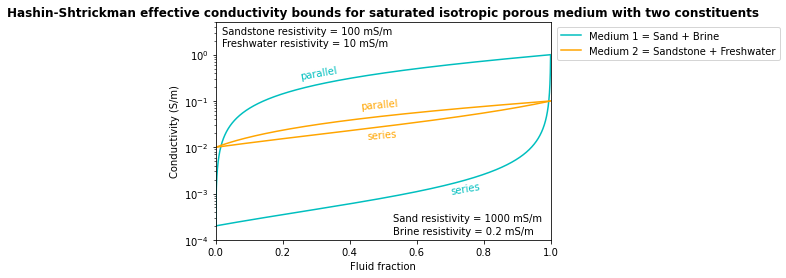

In [149]:
# set constants values
sigma_brine = 1
sigma_sand = 0.2e-3

sigma_water = 0.1
sigma_sandstone = 10e-3

por_range = np.linspace(0, 1, 100000) # set range of temperature

sigma_par_values_case1 = [] # initiate an empty list for 𝜌
sigma_ser_values_case1 = [] # initiate an empty list for 𝜇

sigma_par_values_case2 = [] # initiate an empty list for 𝜌
sigma_ser_values_case2 = [] # initiate an empty list for 𝜇

for x in por_range:
    
    beta = x
    
    sigma_f = sigma_brine
    sigma_s = sigma_sand
    
    sigma_conductive = sigma_f + (1 - beta) * ( (1 / (sigma_s - sigma_f)) + beta / (3 * sigma_f) ) ** -1 # calculate density of water at each temperature in ve
    sigma_par_values_case1.append(sigma_conductive) # insert calculated density of water into the list
    
    sigma_resistive = sigma_s + beta * ( (1 / (sigma_f - sigma_s)) + (1 - beta) / (3 * sigma_s) ) ** -1 # calculate viscosity of water at each temperature in Pa s using Equation 3
    sigma_ser_values_case1.append(sigma_resistive) # insert calculated viscosity of water into the list

    sigma_f = sigma_water
    sigma_s = sigma_sandstone
    
    sigma_conductive = sigma_f + (1 - beta) * ( (1 / (sigma_s - sigma_f)) + beta / (3 * sigma_f) ) ** -1 # calculate density of water at each temperature in kg/m^3 using Equation 2
    sigma_par_values_case2.append(sigma_conductive) # insert calculated density of water into the list
    
    sigma_resistive = sigma_s + beta * ( (1 / (sigma_f - sigma_s)) + (1 - beta) / (3 * sigma_s) ) ** -1 # calculate viscosity of water at each temperature in Pa s using Equation 3
    sigma_ser_values_case2.append(sigma_resistive) # insert calculated viscosity of water into the list

# plot density of water over temperature
plt.figure
plt.plot(por_range, sigma_par_values_case1, 'c', label = 'Medium 1 = Sand + Brine')
plt.plot(por_range, sigma_ser_values_case1, 'c')
plt.plot(por_range, sigma_par_values_case2, 'orange', label = 'Medium 2 = Sandstone + Freshwater')
plt.plot(por_range, sigma_ser_values_case2, 'orange')
plt.title('Hashin-Shtrickman effective conductivity bounds for saturated isotropic porous medium with two constituents', fontweight = "bold") # set plot title
plt.legend(bbox_to_anchor=(1.02, 0.98), loc=2, borderaxespad=0.)
plt.xlabel('Fluid fraction') # set x-axis label
plt.ylabel('Conductivity (S/m)') # set y-axis label
plt.yscale("log")
plt.text(0.02, 2.8, "Sandstone resistivity = 100 mS/m")
plt.text(0.02, 1.5, "Freshwater resistivity = 10 mS/m")
plt.text(0.53, 0.00025, "Sand resistivity = 1000 mS/m")
plt.text(0.53, 0.00013, "Brine resistivity = 0.2 mS/m")
plt.text(0.25, 0.3, "parallel", color = 'c', rotation = 10)
plt.text(0.7, 0.00095, "series", color = 'c', rotation = 10)
plt.text(0.43, 0.065, "parallel", color = 'orange', rotation = 5)
plt.text(0.45, 0.015, "series", color = 'orange', rotation = 5)
plt.xlim([0, 1])
plt.ylim([10 ** -4, 5]);


# References

1. Grant, S. A. 2005. HYDRAULIC PROPERTIES, TEMPERATURE EFFECTS, Encyclopedia of Soils in the Environment, Elsevier
2. https://www.vcalc.com/wiki/MichaelBartmess/Water+Density+by+Temperature